In [2]:
import os
import pickle
import warnings
import dateutil.parser as parser
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [8]:
def get_start_dates_tlg(root='Telegram data'):
    files = os.listdir(f'{root}')
    files.remove('.DS_Store')

    fig, axs = plt.subplots(nrows=len(files)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по каналам по дням", fontsize=30)
    fig.tight_layout()

    for file, ax in zip(files, axs.ravel()):
        tmp = pd.read_json(f'{root}/{file}')['date'].dt.round('D')
        date = tmp.iloc[-1]
        ax.hist(tmp, bins=len(np.unique(tmp)))
        ax.set_title(f'{file[:-14]} начал работу {date}')
    plt.show()

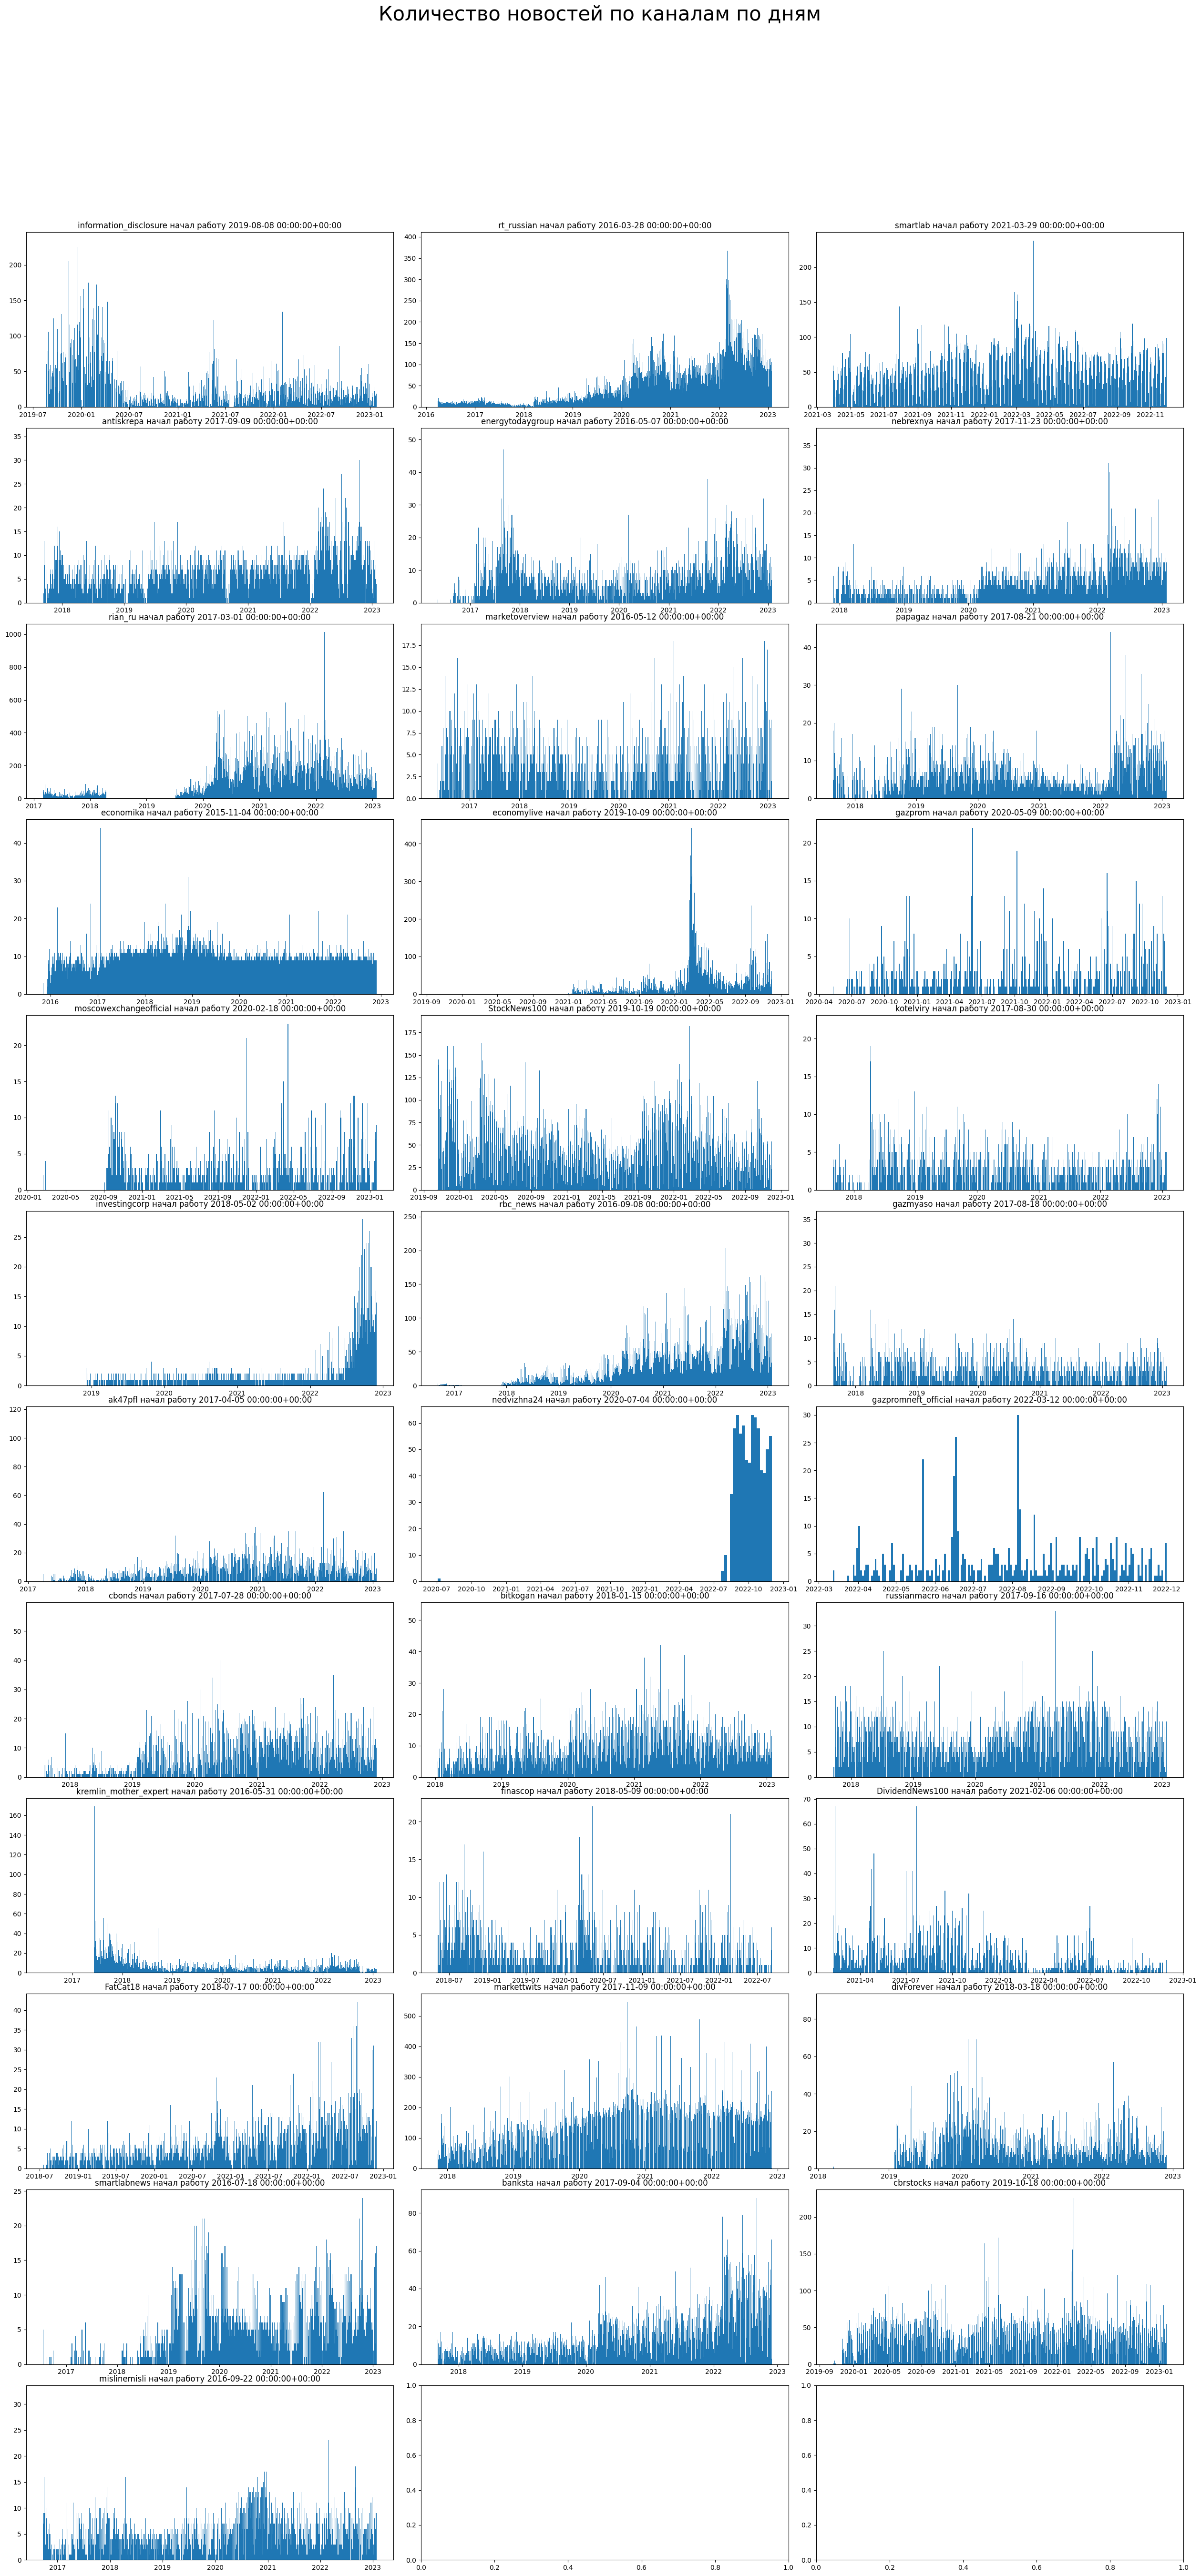

In [9]:
get_start_dates_tlg()

In [13]:
def get_dates_tlg(root='Telegram data'):
    files = os.listdir(f'{root}')
    files.remove('.DS_Store')
    dates = pd.Series()
    for file in files:
        tmp = pd.to_datetime(pd.read_json(f'{root}/{file}')['date']).dt.round('D')
        dates = pd.concat([dates, tmp], axis=0)
    
    return dates

In [14]:
dates_tg = get_dates_tlg()

/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_835/1737738581.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates = pd.Series()


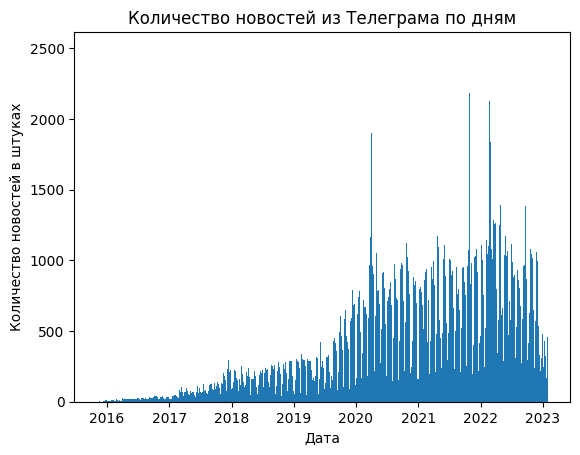

In [15]:
plt.hist(dates_tg, bins=len(np.unique(dates_tg)))
plt.xlabel('Дата')
plt.ylabel('Количество новостей в штуках')
plt.title('Количество новостей из Телеграма по дням')
plt.show()

In [3]:
def dates_news(roots):
    fig, axs = plt.subplots(nrows=len(roots)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по категориям изданий", fontsize=30)
    fig.tight_layout()

    for root, ax in zip(roots, axs.ravel()):
        date = pd.read_csv(f'{root}/{root}.csv')['date']
        date = pd.to_datetime(date).dt.round('D')
        
        ax.hist(date, bins=len(np.unique(date)))
        ax.set_title(f'{root}')

    plt.show()

In [4]:
roots = ['komersant_business', 'komersant_consumer_market', 'komersant_economics', 'komersant_finance', 'komersant_politics',
        'lenta_economy', 'ria_economy', 'ria_politics',
        'vedomosti_business', 'vedomosti_economics', 'vedomosti_finance', 'vedomosti_invest', 'vedomosti_personal_account']

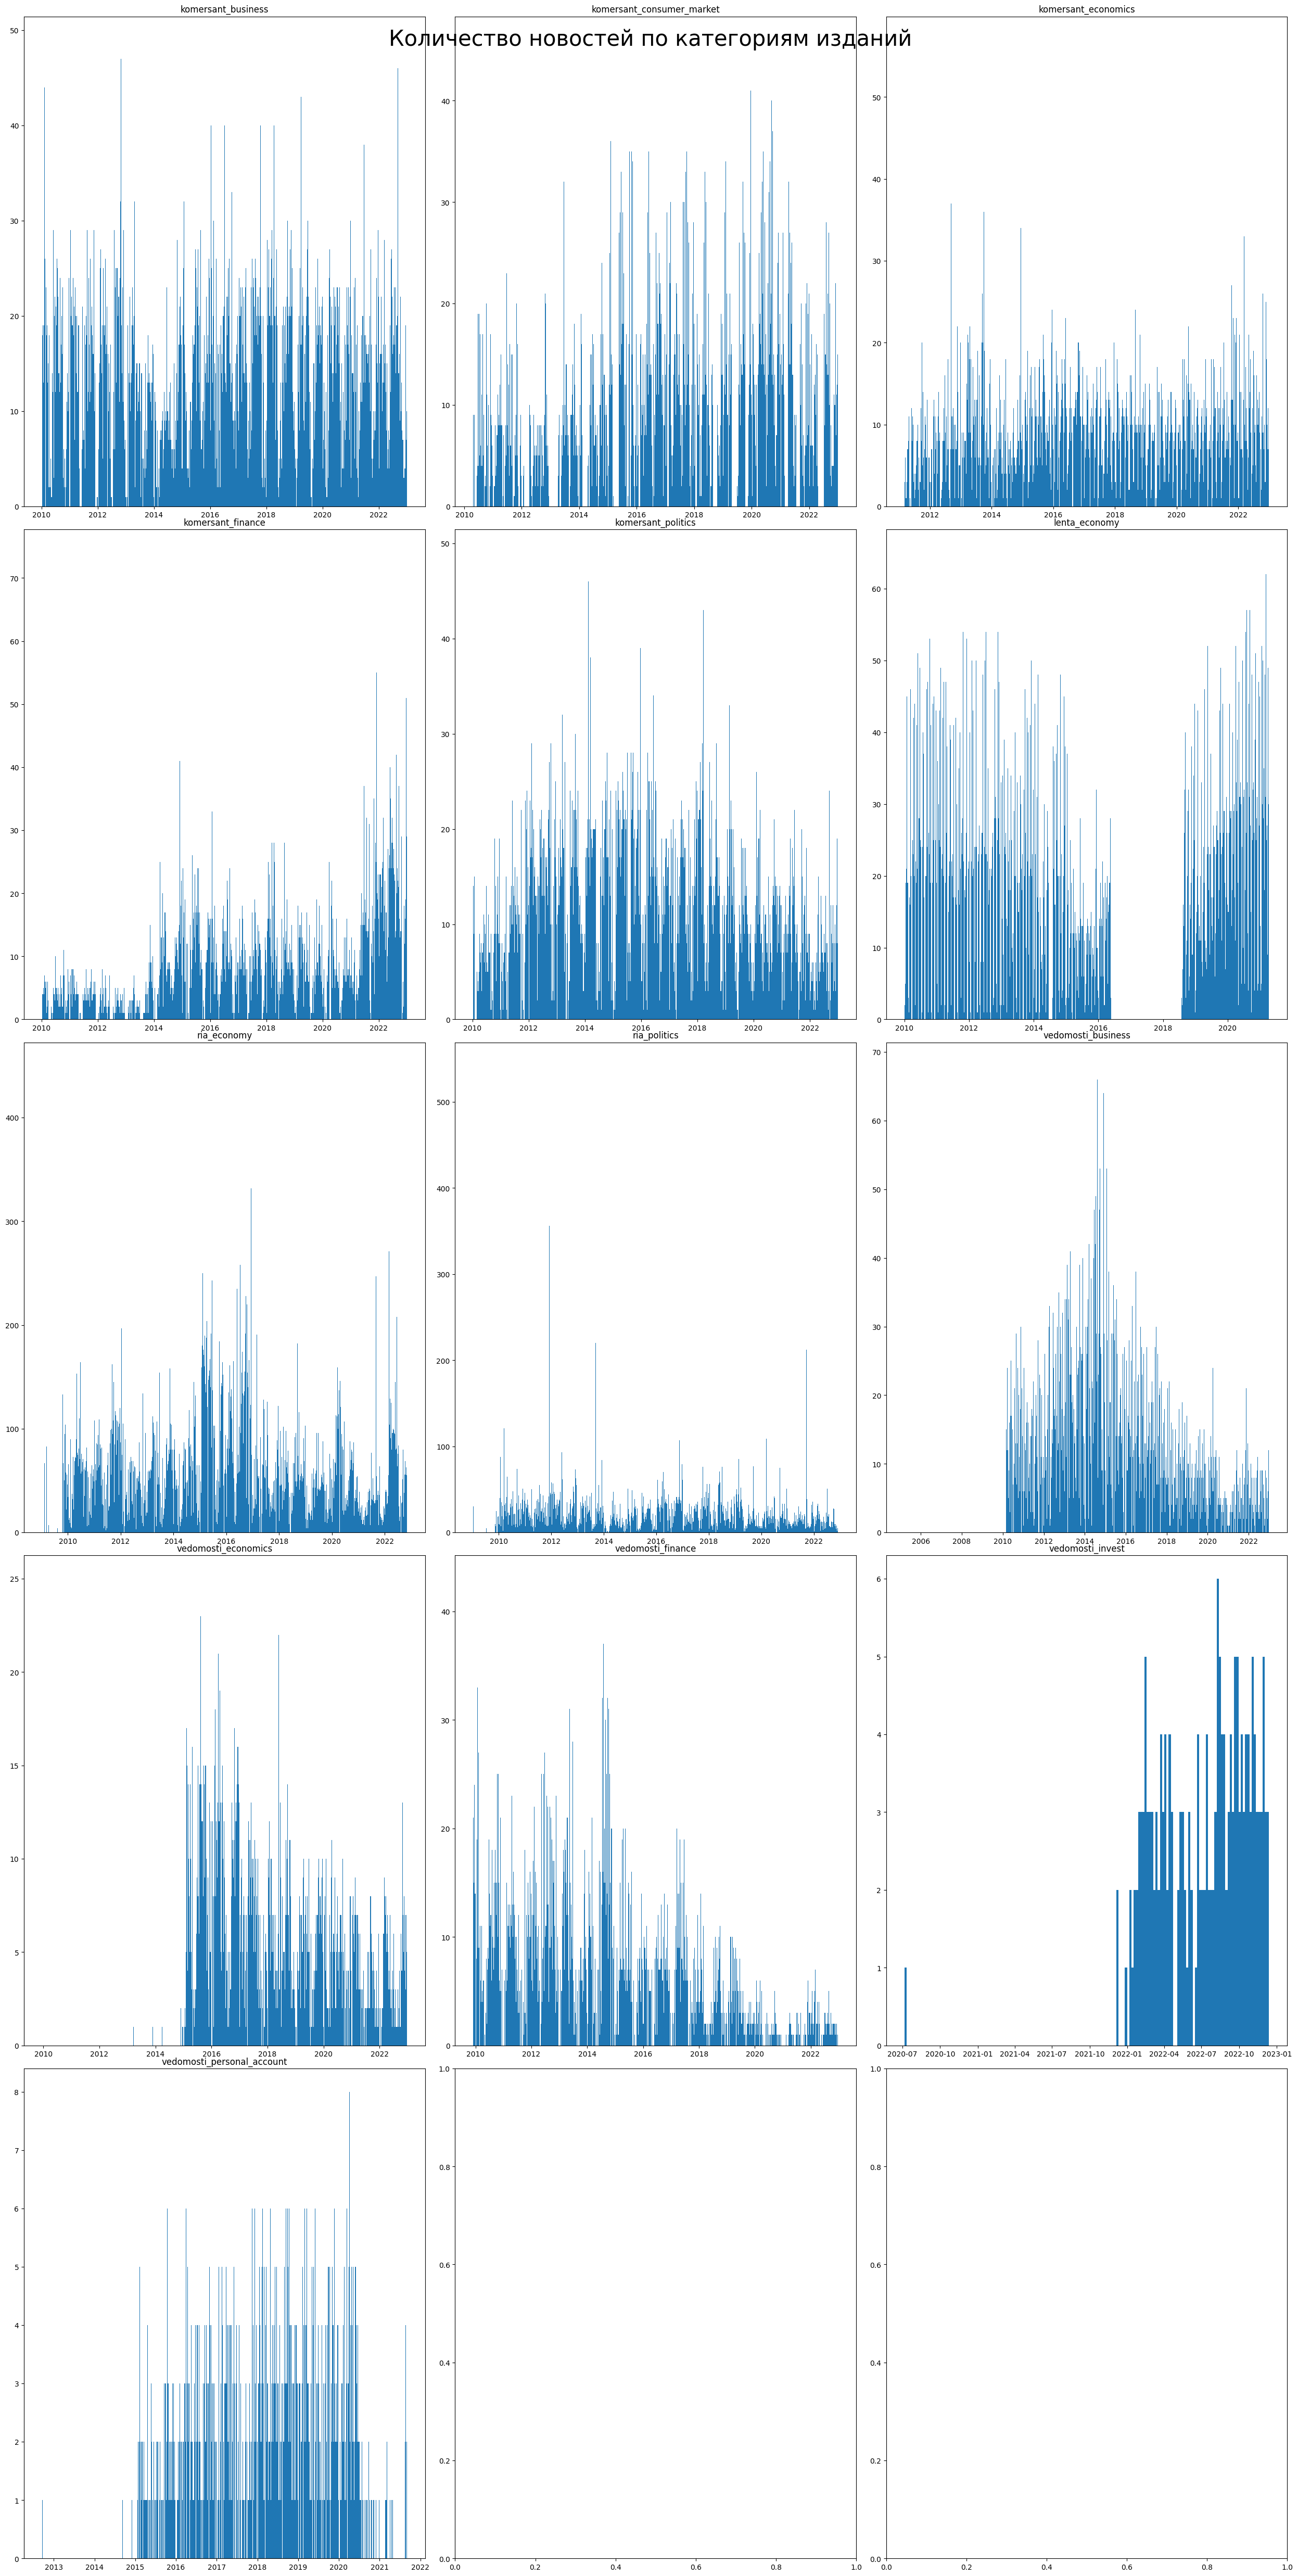

In [4]:
dates_news(roots)

In [5]:
def avg_time_news(roots):
    df = pd.DataFrame()
    for root in roots:
        date = pd.read_csv(f'{root}/{root}.csv')['date']
        date = pd.to_datetime(date)
        delta = (date - date.shift(1)).dt.total_seconds() 
        avg_time = delta.mean() / 60
        max_time = delta.max() / 60
        min_time = delta.min() / 60
        times = pd.DataFrame([[root, min_time, avg_time, max_time]], columns=['Источник', 'Минимальное время', 'Среднее время', 'Максимальное время'])
        df = pd.concat([df, times], axis=0).reset_index(drop=True)
    return df

avg_time_news(roots)

,Источник,Минимальное время,Среднее время,Максимальное время
0,komersant_business,0.000000,105.875904,1.688768e+04
1,komersant_consumer_market,0.000000,199.144702,1.541000e+05
2,komersant_economics,0.000000,171.190171,1.564723e+04
3,komersant_finance,0.000000,189.860093,2.891662e+04
4,komersant_politics,0.000000,128.328883,1.728277e+04
5,lenta_economy,0.000000,122.411281,1.151984e+06
6,ria_economy,0.000000,26.308400,4.338700e+04
7,ria_politics,0.000000,71.129563,4.331100e+04
8,vedomosti_business,0.000000,257.475144,2.605721e+06
9,vedomosti_economics,0.000000,858.657960,1.713600e+06


In [6]:
def avg_time_tg():
    roots = os.listdir('Telegram prep')
    roots.remove('.DS_Store')
    roots.remove('messages')
    df = pd.DataFrame()
    for root in roots:
        date = pd.read_csv(f'Telegram prep/{root}', low_memory=False)['date']
        date = pd.to_datetime(date)
        delta = (date - date.shift(1)).dt.total_seconds()
        avg_time = delta.mean() / 60
        max_time = delta.max() / 60
        min_time = delta.min() / 60
        times = pd.DataFrame([[root[:-4], min_time, avg_time, max_time]], columns=['Источник', 'Минимальное время', 'Среднее время', 'Максимальное время'])
        df = pd.concat([df, times], axis=0).reset_index(drop=True)
    return df
avg_time_tg()

,Источник,Минимальное время,Среднее время,Максимальное время
0,markettwits,0.0,12.451175,5888.966667
1,rian_ru,0.0,16.289336,644931.950000
2,information_disclosure,0.0,60.856855,24148.200000
3,moscowexchangeofficial,0.0,1157.579876,273156.116667
4,smartlab,0.0,28.834627,3690.066667
5,cbonds,0.0,225.998051,17395.250000
6,economylive,0.0,67.278516,7274.500000
7,cbrstocks,0.0,40.088046,31780.200000
8,gazmyaso,0.0,558.540306,28683.800000
9,divForever,0.0,165.836885,430861.250000


### Граф связей Телеграмм каналов

In [22]:
files = os.listdir('Telegram prep')
files = [f for f in files if f[0]!='.']
files.remove('messages')
channel_lst = [ch[:-4] for ch in files]
id_lst = ['1203560567', '1101170442', '1421472880', '1453563350', '1441563903',
         '1138794914', '1425338344', '1197210433', '1101154601', '1218872940',
         '1366793743', '1050451805', '1468147635', '1063908560', '1036362176',
          '1097119425', '1066174394', '1061574166', '1445969592', '1595965216', '1152653774', '1408960847',
          '1107922757', '1132713042', '1428717522', '1121232878', '1136626166', '1054426741', '1191785705',
           '1141631276', '1099860397', '1075101206', '1006112008', '1199979298']
channel_id_dct = {i:j for i,j in zip(channel_lst, id_lst)}
channel_name_dct = {int(j):i for i,j in channel_id_dct.items()} 

In [3]:
edges = []
for file, channel in zip(files, channel_lst):
    df = pd.read_csv(f'Telegram prep/{file}', low_memory=False)
    df = df[df['fwd_from'].notna()].reset_index(drop=True)
    for idx, row in df.iterrows():
        fwd_from = eval(row['fwd_from'])['from_id']
        if fwd_from is not None and 'channel_id' in fwd_from:
            fwd = fwd_from['channel_id']
            # edges.append([channel, fwd])
            edges.append([int(channel_id_dct[channel]), fwd])

In [26]:
unique, counts = np.unique(edges, return_counts=True)
edges_filtered = unique[counts > 50]

bool_array = []
for edge in edges:
    if (edge[0] in edges_filtered) and (edge[1] in edges_filtered) and (edge[0] in channel_name_dct) and (edge[1] in channel_name_dct):
        bool_array.append(True)
    else:
        bool_array.append(False)

edges_fil = np.array(edges)[bool_array]

In [30]:
edges_fil = np.vectorize(channel_name_dct.get)(edges_fil)

In [32]:
g = nx.DiGraph()
g.add_edges_from(edges_fil)

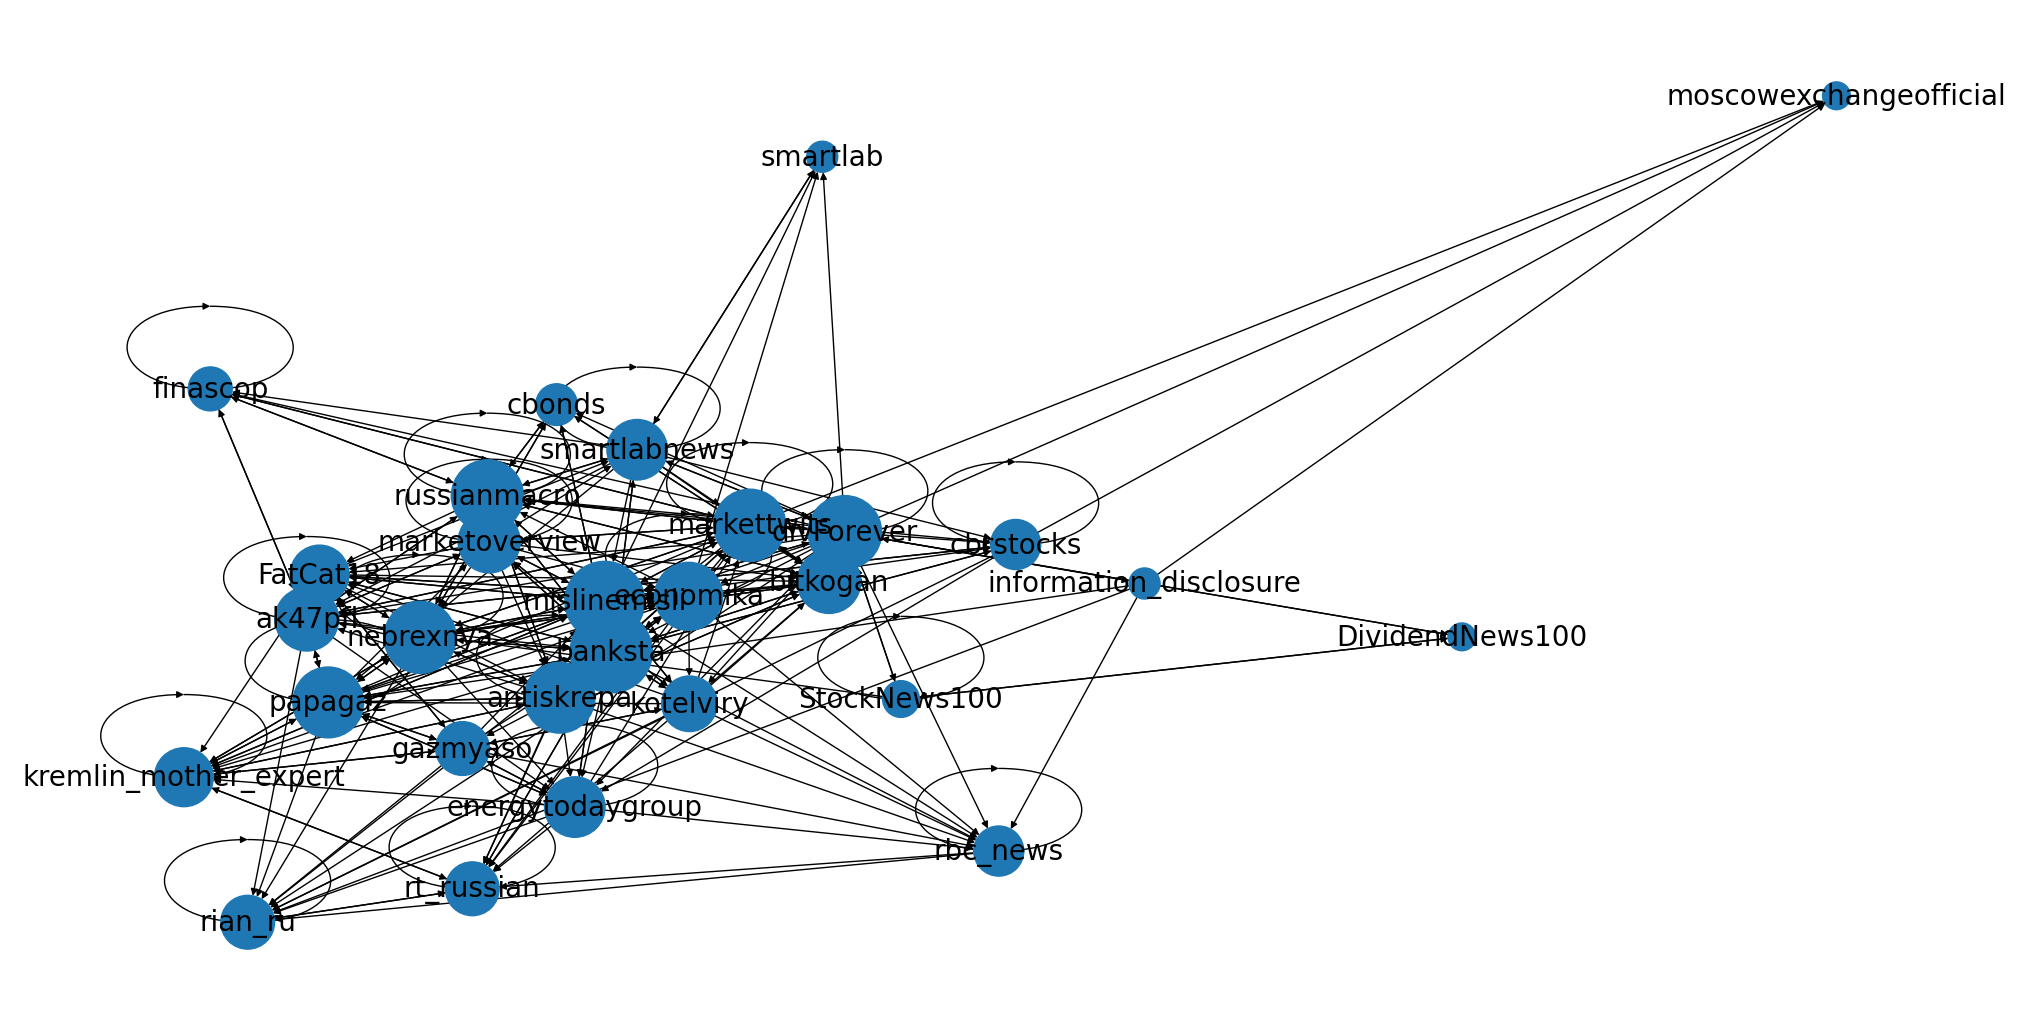

In [39]:
plt.figure(figsize = (20, 10))
pos = nx.spring_layout(g, scale=20, k=3/np.sqrt(g.order()))
d = dict(g.degree)
nx.draw(g, pos, with_labels = True, font_size = 20, node_size=[d[k]*100 for k in d])
plt.show()

### Распределение новостей во времени по компаниям

In [5]:
companies = {
    'ALRS': 'alrosa-ao', 'AFLT': 'aeroflot', 'VTBR': 'vtb', 'GAZP' : 'gazprom', 'GMKN': 'nornickel-gmk', 'LSRG': 'lsr', 
    'DSKY': 'detsky-mir', 'IRAO': 'inter-rao-ao', 'LKOH': 'lukoil', 'MAGN': 'mmk', 'MOEX': 'moscowexchange', 'CBOM': 'oao-mkb-ao', 
    'MTSS': 'mts', 'VKCO': 'gdr-vk-company-limited-ord-shs_vkco-tqbr', 'ROSN': 'rosneft', 'NLMK': 'nlmk-ao', 'NVTK': 'novatek', 'PIKK': 'pik', 
    'PLZL': 'polus-zoloto', 'RTKM': 'rostelecom', 'RUAL': 'united-company-rusal-plc', 'HYDR': 'rusgidro', 'SBER': 'sberbank', 'CHMF': 'severstal-ao', 
    'AFKS': 'afk-sistema', 'SNGS': 'surgut', 'TATN': 'tatneft-3', 'TCSG': 'gdr-tcs-group-holding-ord-shs_tcsg', 'TRNFP': 'transneft-pref', 
    'POGR': 'petropavlovsk-plc_pogr', 'PHOR': 'phosagro-ao', 'FEES': 'fsk-ees', 'HHRU': 'adr-headhunter-group-ord-shs_hhru', 'YNDX': 'pllc-yandex-n-v'}

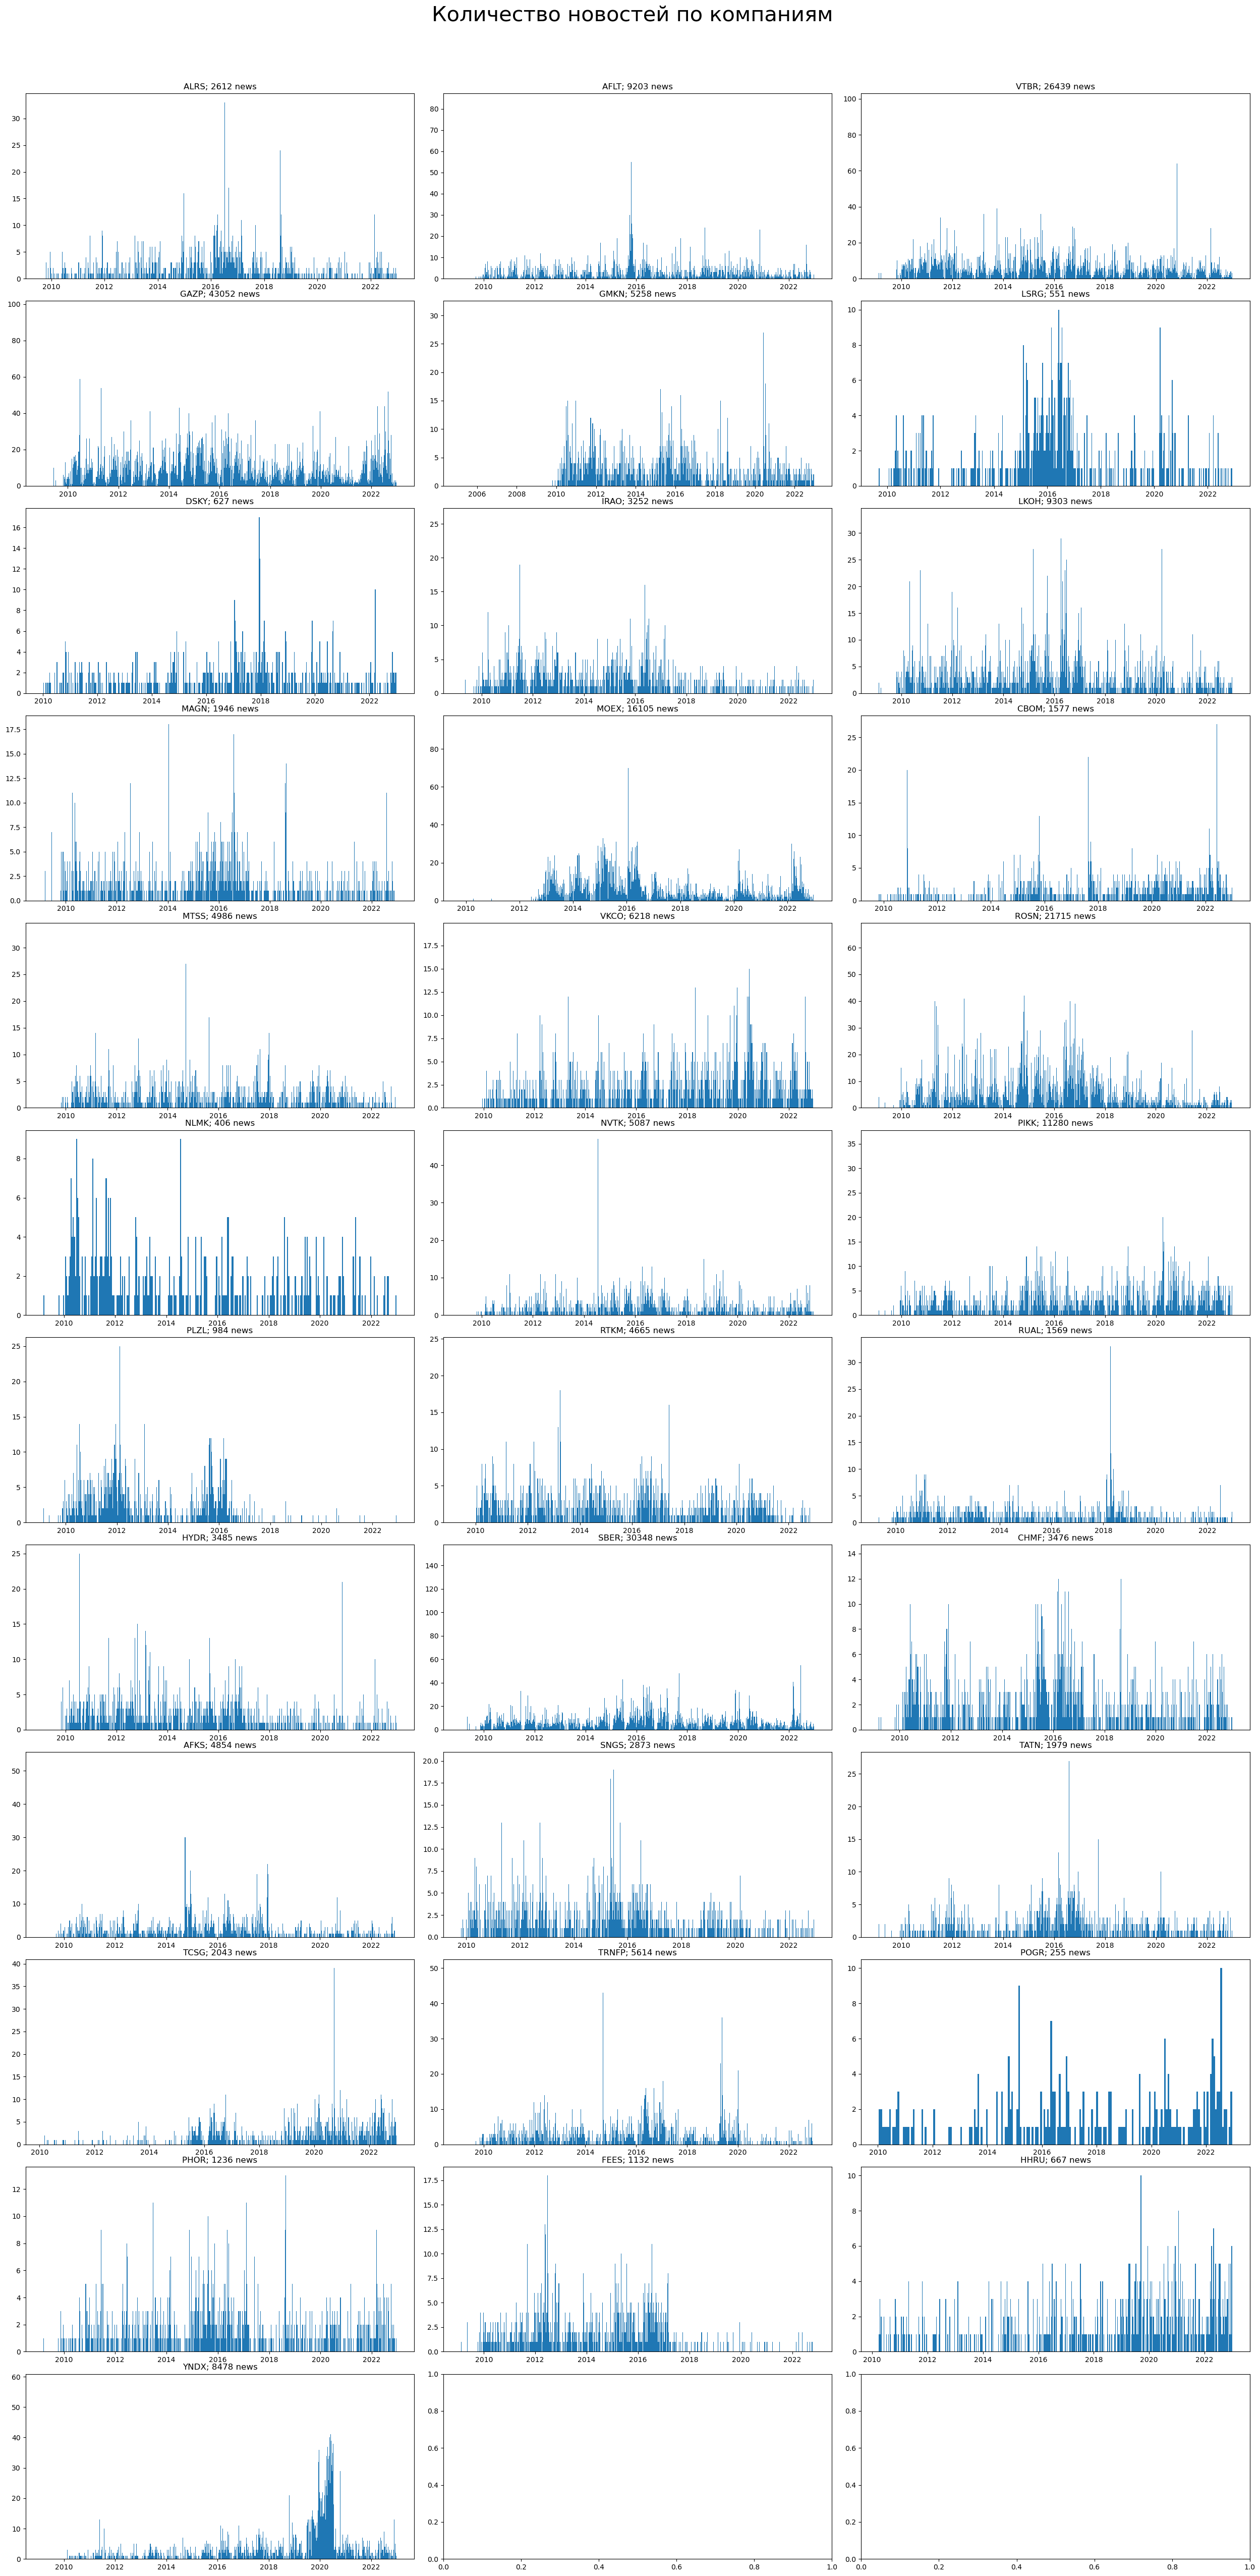

In [9]:
def plot_company_news_hist(roots, companies):
    cols = ['date'] + [i for i in companies.keys()]
    agg_df = pd.DataFrame()
    for root in roots:
        df = pd.read_csv(f'{root}/{root}.csv')
        df = df[cols]
        agg_df = pd.concat([agg_df, df])
    
    agg_df['date'] = pd.to_datetime(agg_df['date'])
    
    fig, axs = plt.subplots(nrows=len(companies)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по компаниям", fontsize=30, y=1.02)
    fig.tight_layout()

    for company, ax in zip(companies, axs.ravel()):
        date = agg_df[agg_df[company] == True]['date'].dt.round('D')
        
        try:
            ax.hist(date, bins=len(np.unique(date)))
        except ValueError as ex:
            print(ex)
            print(f'{company}')

        ax.set_title(f'{company}; {len(date)} news')

    plt.show()

plot_company_news_hist(roots, companies)

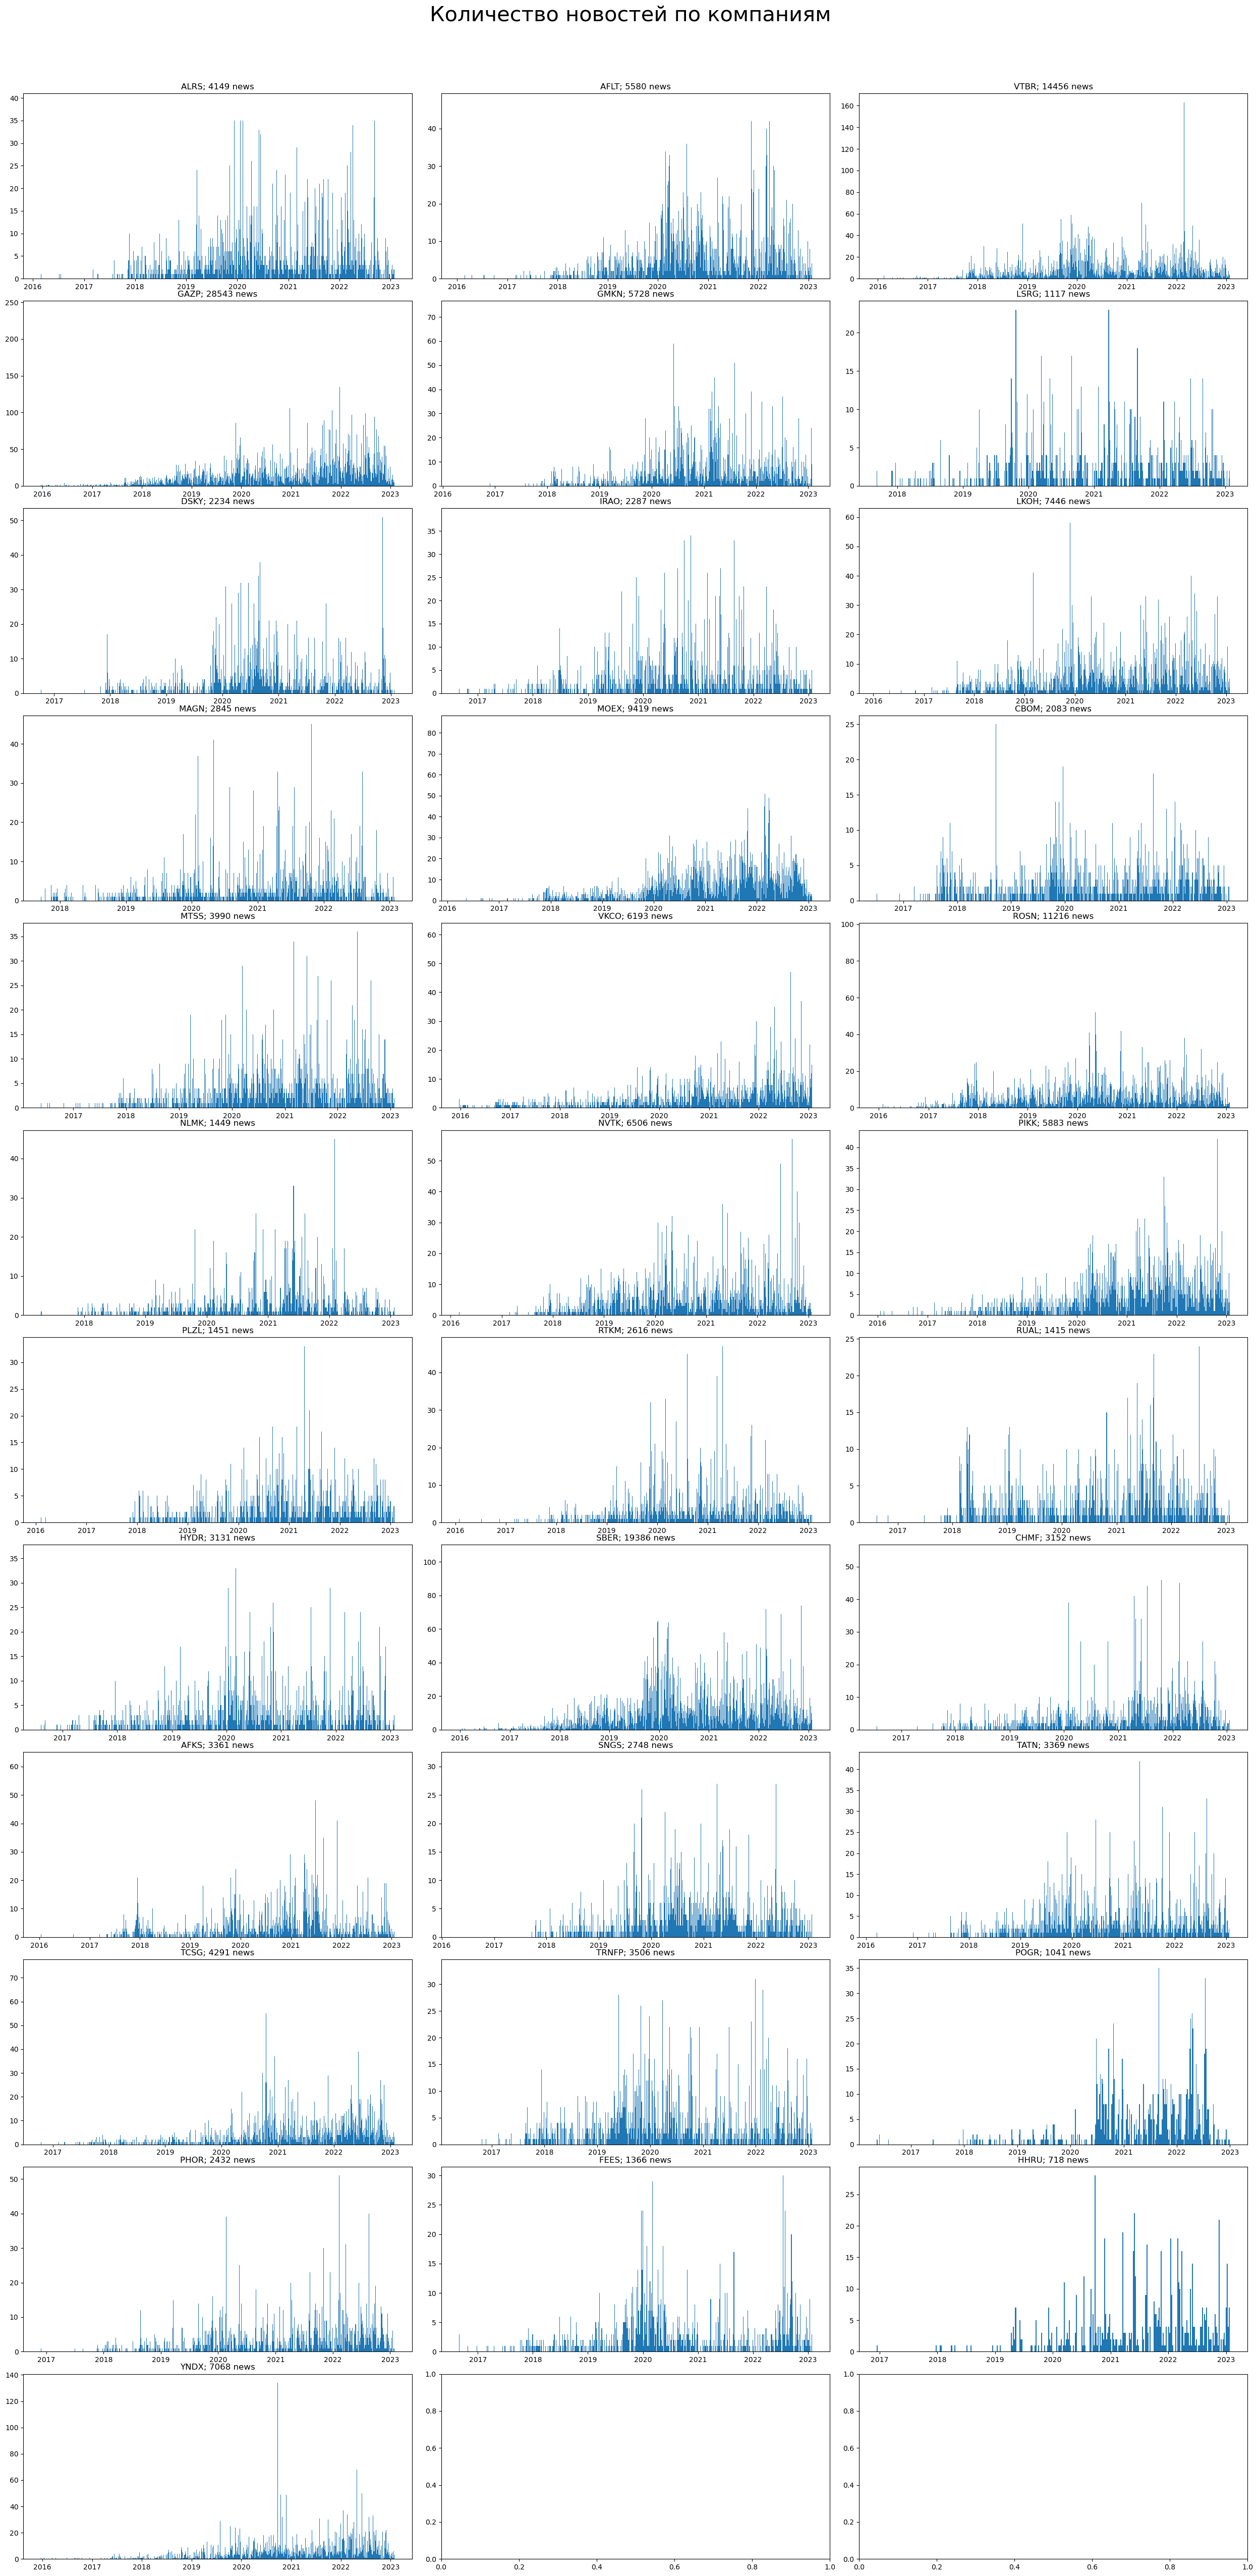

In [10]:
def plot_company_news_hist_tg(companies):
    cols = ['date'] + [i for i in companies.keys()]
    agg_df = pd.DataFrame()
    roots = os.listdir('Telegram prep')
    if '.DS_Store' in roots:
        roots.remove('.DS_Store')
    if 'messages' in roots:
        roots.remove('messages')
    for root in roots:
        df = pd.read_csv(f'Telegram prep/{root}', low_memory=False)
        df = df[cols]
        agg_df = pd.concat([agg_df, df])
    
    agg_df['date'] = pd.to_datetime(agg_df['date'])
    
    fig, axs = plt.subplots(nrows=len(companies)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по компаниям", fontsize=30, y=1.02)
    fig.tight_layout()

    for company, ax in zip(companies, axs.ravel()):
        date = agg_df[agg_df[company] == True]['date'].dt.round('D')
        
        try:
            ax.hist(date, bins=len(np.unique(date)))
        except ValueError as ex:
            print(ex)
            print(f'{company}')
            
        ax.set_title(f'{company}; {len(date)} news')

    plt.show()
    
plot_company_news_hist_tg(companies)

In [11]:
sectors = ['finance', 'gold', 'ferrous_metallurgy', 'oil_gas', 'non_ferrous_metallurgy',
          'electrical networks', 'telecom', 'it', 'real_estate']

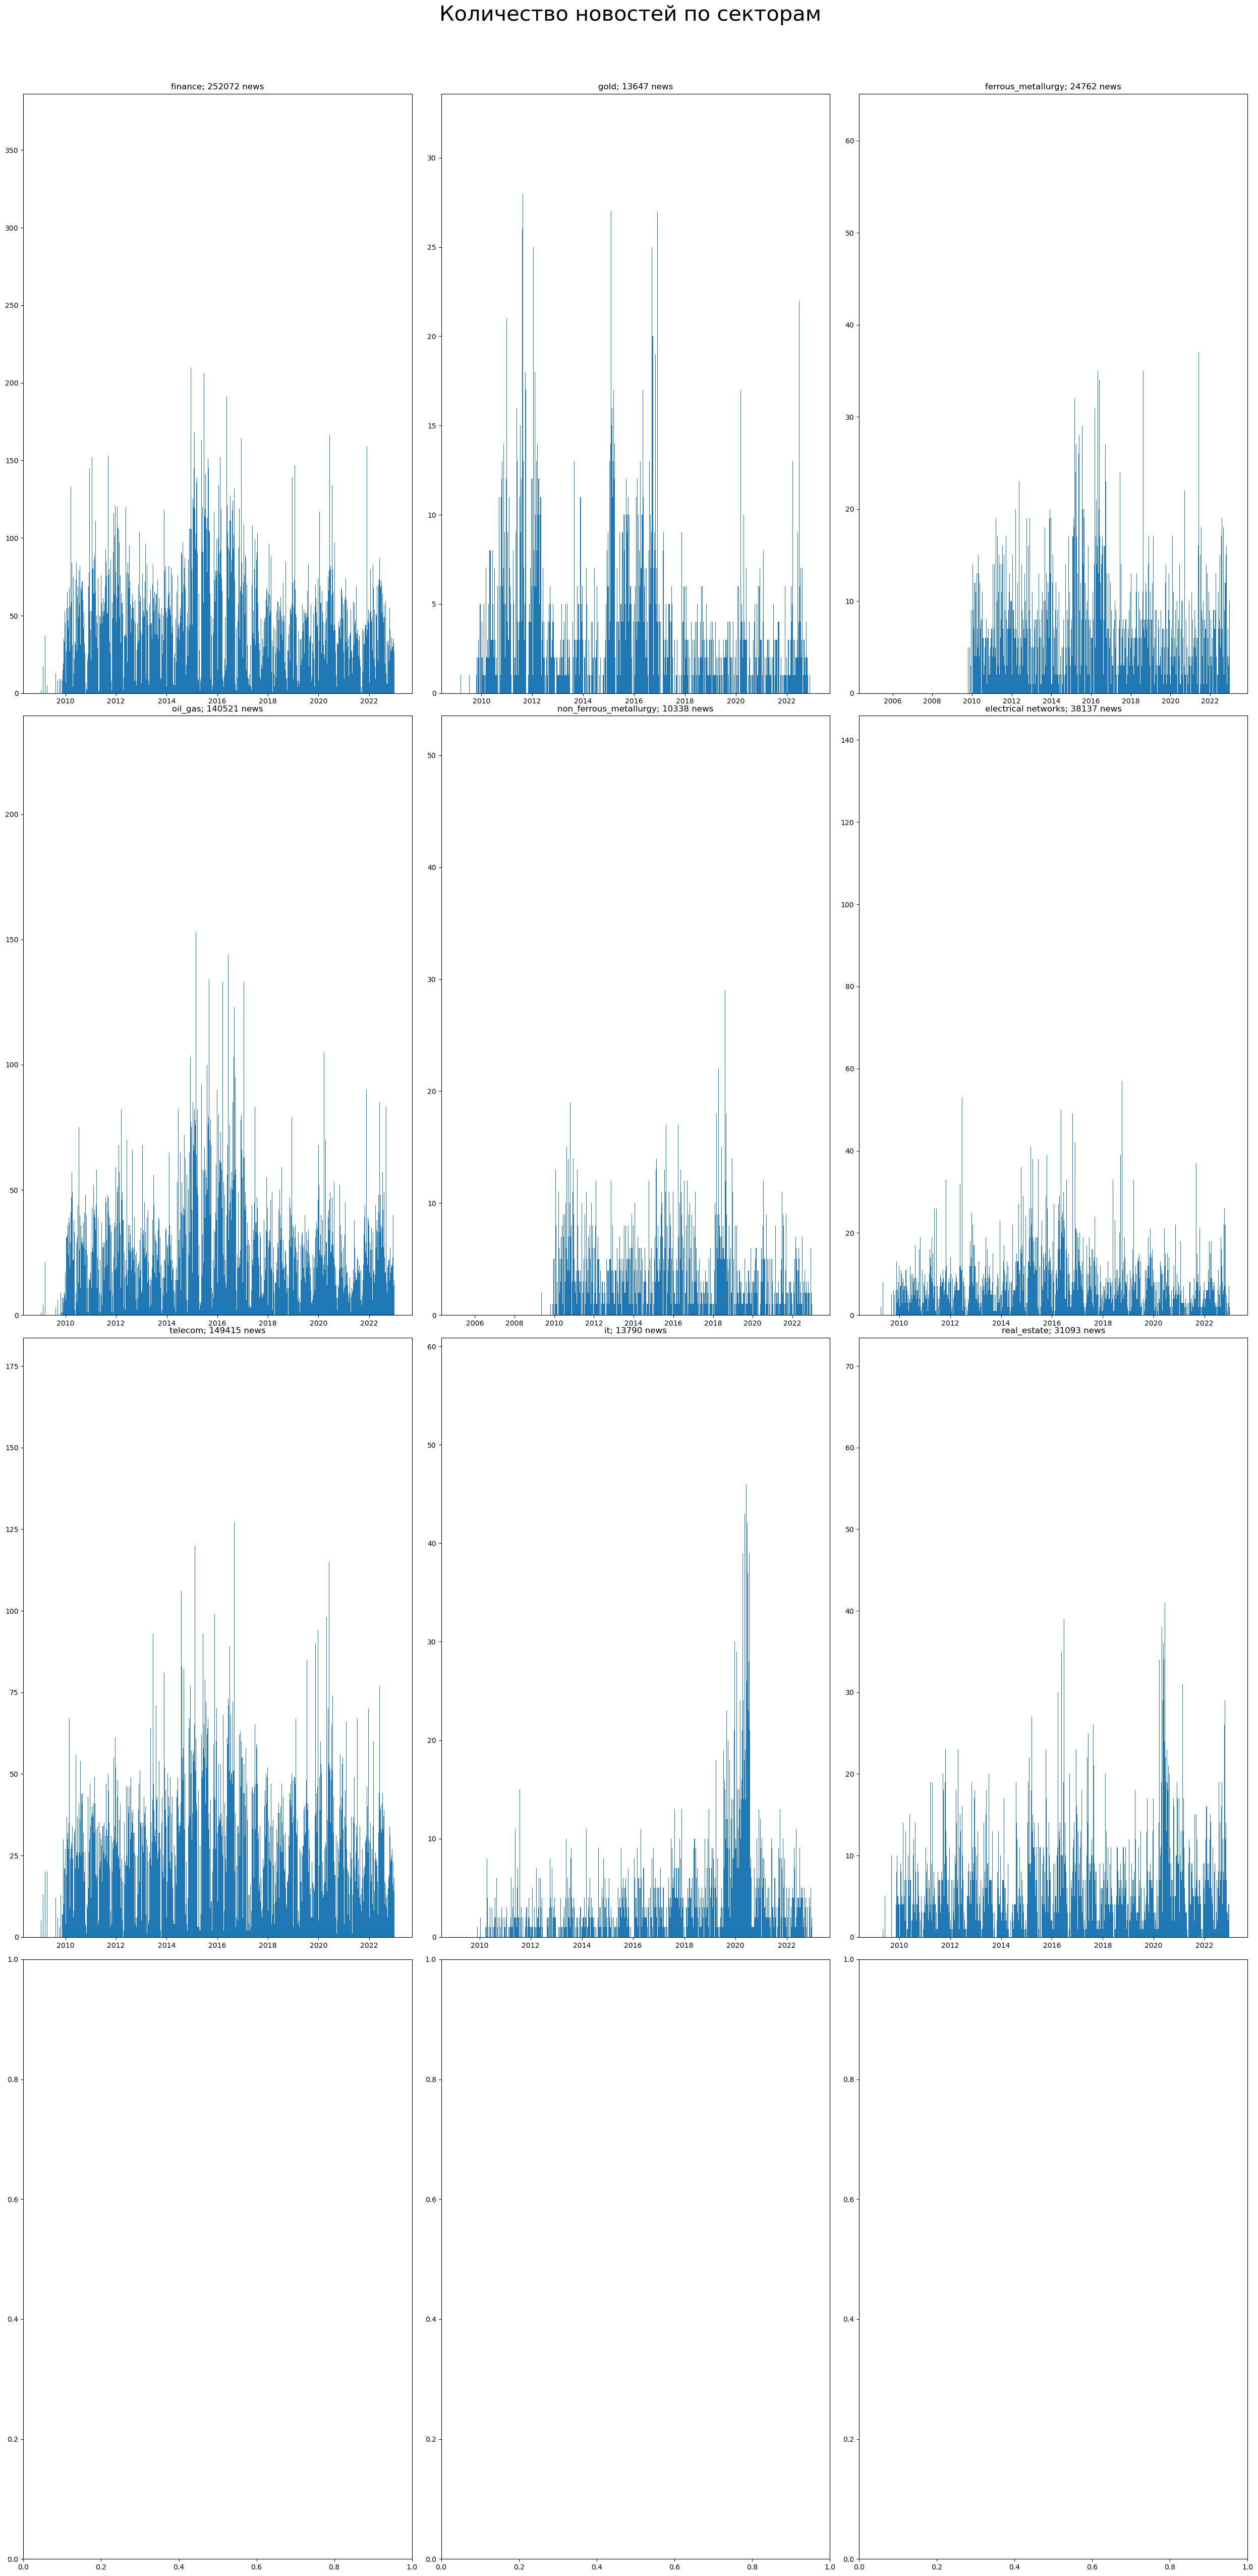

In [16]:
def plot_sector_news_hist(roots, sectors):
    cols = ['date'] + [i for i in sectors]
    agg_df = pd.DataFrame()
    for root in roots:
        df = pd.read_csv(f'{root}/{root}.csv')
        df = df[cols]
        agg_df = pd.concat([agg_df, df])
    
    agg_df['date'] = pd.to_datetime(agg_df['date'])
    
    fig, axs = plt.subplots(nrows=len(sectors)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по секторам", fontsize=30, y=1.02)
    fig.tight_layout()

    for sector, ax in zip(sectors, axs.ravel()):
        date = agg_df[agg_df[sector] == True]['date'].dt.round('D')
        
        try:
            ax.hist(date, bins=len(np.unique(date)))
        except ValueError as ex:
            print(ex)
            print(f'{sector}')

        ax.set_title(f'{sector}; {len(date)} news')

    plt.show()

plot_sector_news_hist(roots, sectors)

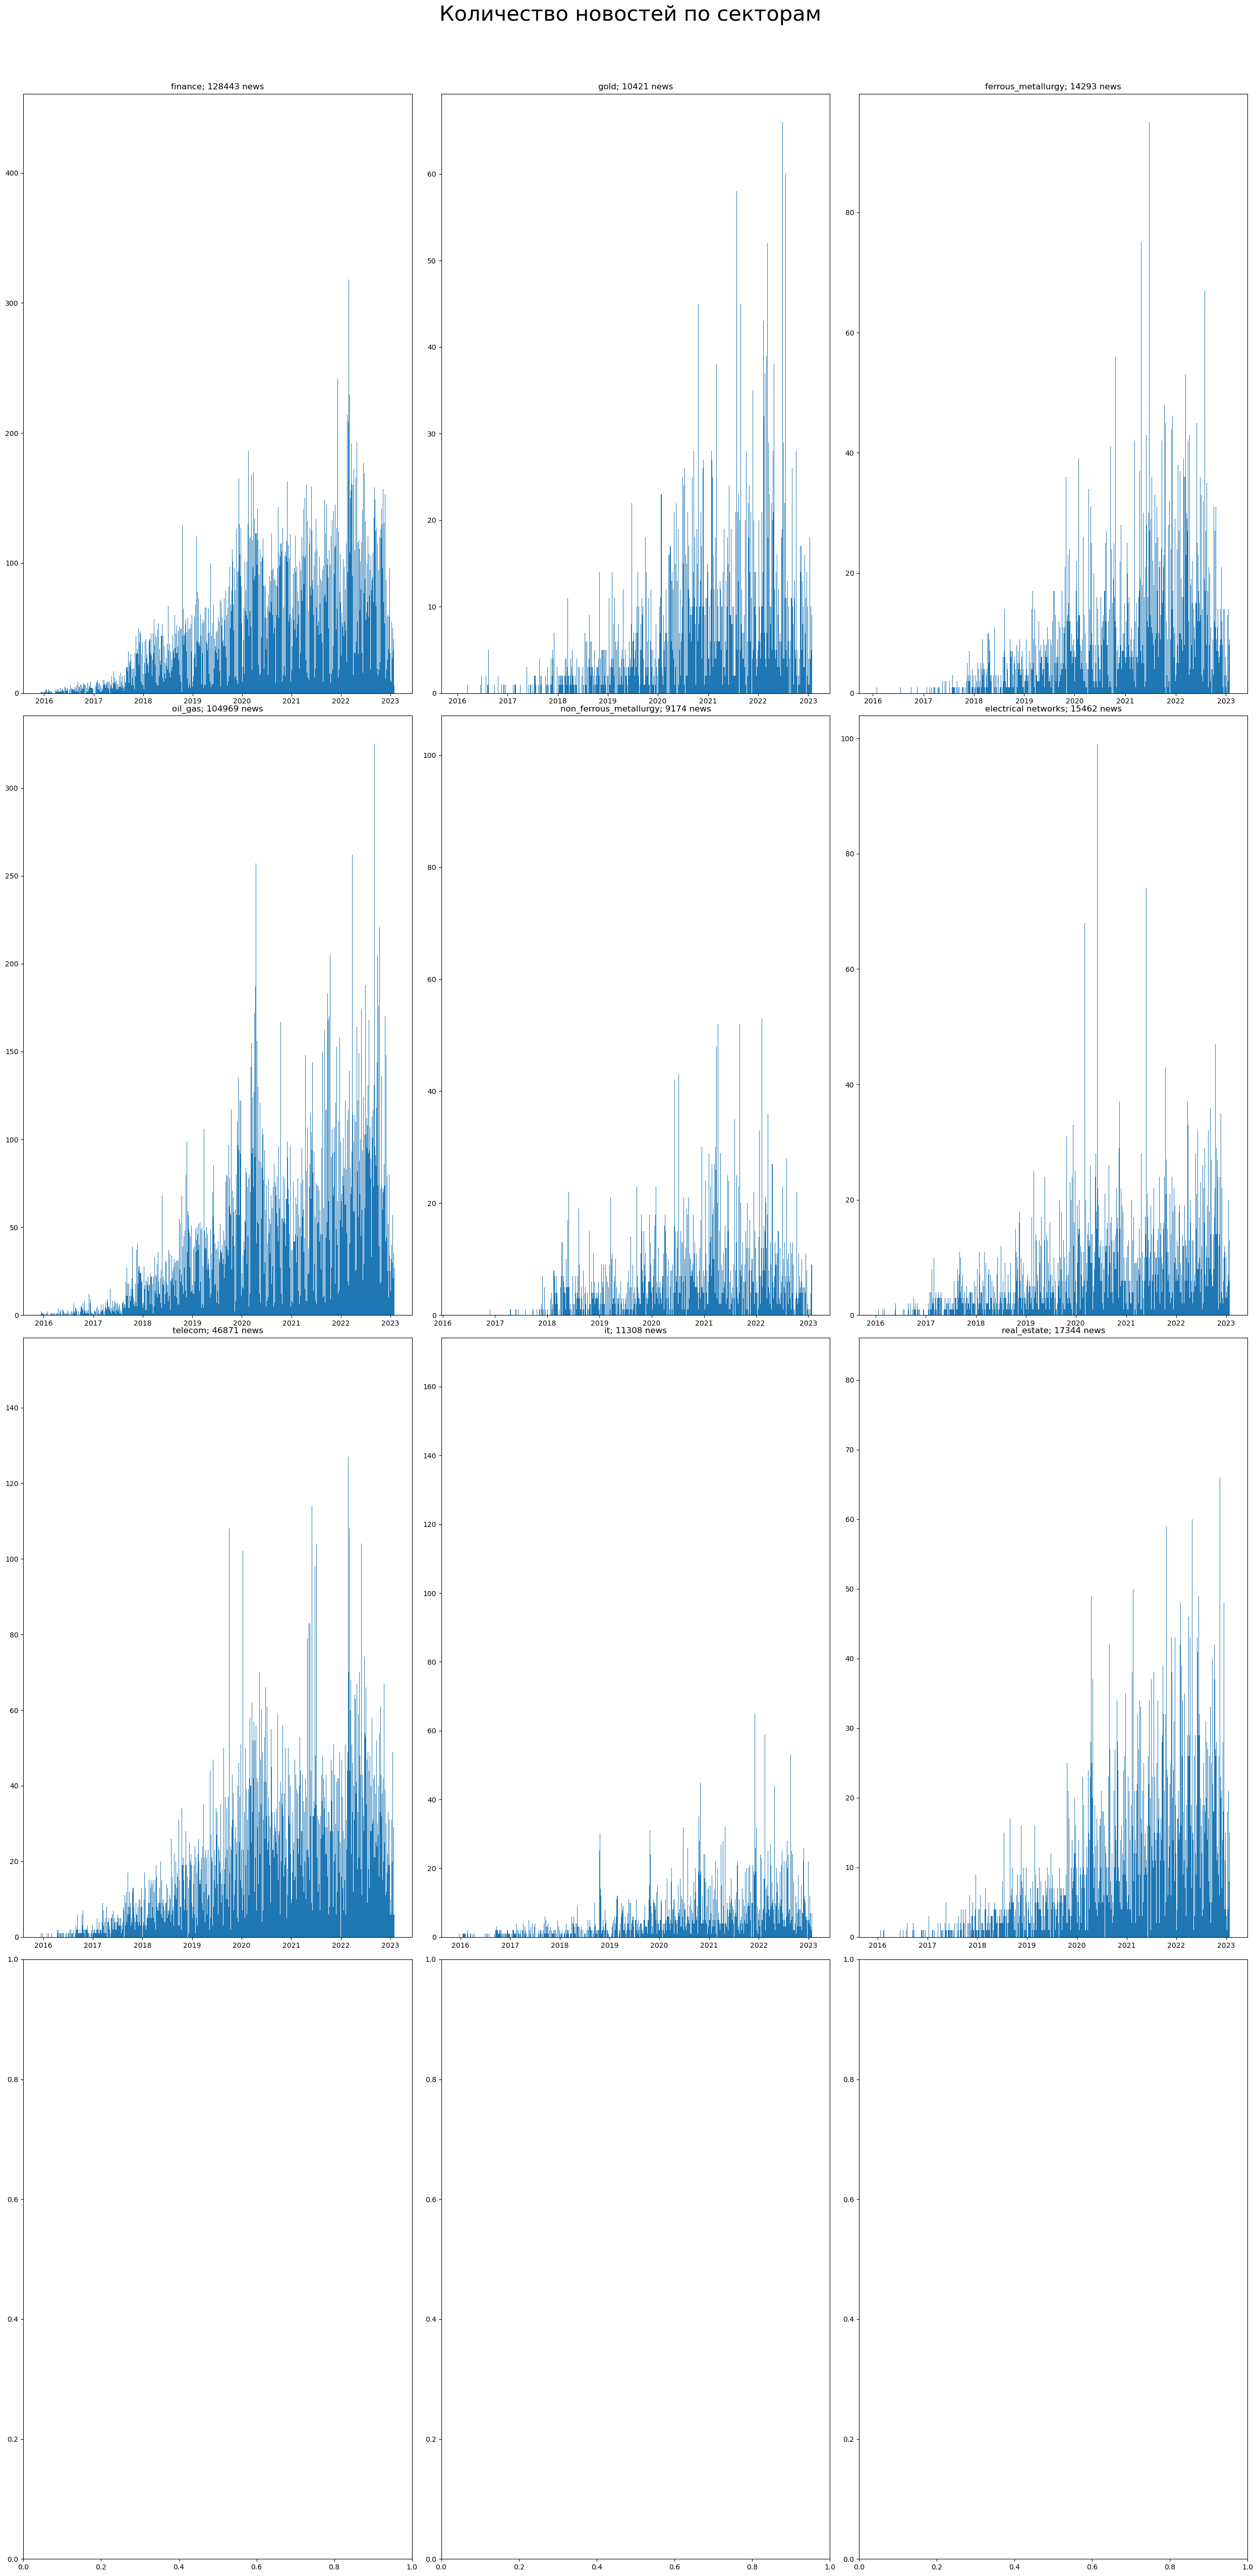

In [17]:
def plot_sector_news_hist_tg(sectors):
    cols = ['date'] + [i for i in sectors]
    agg_df = pd.DataFrame()
    roots = os.listdir('Telegram prep')
    if '.DS_Store' in roots:
        roots.remove('.DS_Store')
    if 'messages' in roots:
        roots.remove('messages')
    for root in roots:
        df = pd.read_csv(f'Telegram prep/{root}', low_memory=False)
        df = df[cols]
        agg_df = pd.concat([agg_df, df])
    
    agg_df['date'] = pd.to_datetime(agg_df['date'])
    
    fig, axs = plt.subplots(nrows=len(sectors)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по секторам", fontsize=30, y=1.02)
    fig.tight_layout()

    for sector, ax in zip(sectors, axs.ravel()):
        date = agg_df[agg_df[sector] == True]['date'].dt.round('D')
        
        try:
            ax.hist(date, bins=len(np.unique(date)))
        except ValueError as ex:
            print(ex)
            print(f'{sector}')
            
        ax.set_title(f'{sector}; {len(date)} news')

    plt.show()
    
plot_sector_news_hist_tg(sectors)